# EXPLORATORY DATA ANALYSIS OF TERRORISM

## Introduction
**The objective of this project is to conduct an in-depth analysis of the terrorism dataset through Exploratory Data Analysis (EDA). Our aim is to discover valuable insights and recurring patterns within the data. Through this analysis, we intend to unveil trends, pinpoint regions with heightened risk, gain insights into the methods used in attacks, and potentially shed light on the underlying factors that influence terrorist activities.**


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data=pd.read_csv(r"globalterrorism.csv" ,encoding="latin1")

<ipython-input-17-2e371e66f213>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"globalterrorism.csv" ,encoding="latin1")


In [18]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [19]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## Data cleaning

In [20]:
data.isnull()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True
181689,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True


In [21]:
data.describe()


,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505650,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814043,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
threshold=0.2
null_percentage=(data.isnull().sum()/len(data)).sort_values(ascending=False)
droping_columns=null_percentage[null_percentage>threshold].index
df=data.drop(columns=droping_columns)

**We eliminated the columns which have more than 20% null values.**

In [23]:
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,1.970010e+11,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,1.970010e+11,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,1.970010e+11,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


In [24]:
df.shape

(181691, 47)

In [25]:
data.shape

(181691, 135)

In [26]:
null_percentage.sort_values(ascending= False)

gsubname3           0.999890
weapsubtype4_txt    0.999615
weapsubtype4        0.999615
weaptype4           0.999598
weaptype4_txt       0.999598
                      ...   
imonth              0.000000
iday                0.000000
iyear               0.000000
crit1               0.000000
eventid             0.000000
Length: 135, dtype: float64

In [27]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  float64
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  crit1             181691 non-null  int64  
 16  crit2             18

**We have chose the columns which are usefull for our EDA .**

In [29]:
df.rename(columns={'iyear':"Year",'imonth':"Month", 'iday':"Day",
       'country_txt':"Country",'region_txt':"Region",'city':"City",
       'attacktype1_txt':"Attack_type",'targtype1_txt':"Target_type",
       'targsubtype1_txt':"Target_subtype",'natlty1_txt':"Nationality", 'gname':"Group_name",
       'weaptype1_txt':"Weapon_type",
        'nkill':"Number_kills", 'nwound':"Number_wound",
         },inplace=True)

In [30]:
df=df[["Year","Month","Day","Country","Region","City","Attack_type","Target_type","Target_subtype","Nationality","Group_name","Number_kills","Number_wound","Weapon_type"]]

In [31]:
df

,Year,Month,Day,Country,Region,City,Attack_type,Target_type,Target_subtype,Nationality,Group_name,Number_kills,Number_wound,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,1.0,0.0,Unknown
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,0.0,0.0,Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,1.0,0.0,Unknown
3,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,NaN,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,NaN,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,Armed Assault,Military,Military Checkpoint,Somalia,Al-Shabaab,1.0,2.0,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Russia,Muslim extremists,2.0,7.0,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0.0,Incendiary
181689,2017,12,31,India,South Asia,Imphal,Bombing/Explosion,Government (General),Government Building/Facility/Office,India,Unknown,0.0,0.0,Explosives


In [32]:
df.shape

(181691, 14)

## Attackes per year

In [33]:
df["Year"].value_counts(ascending=False)[:6]

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
Name: Year, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

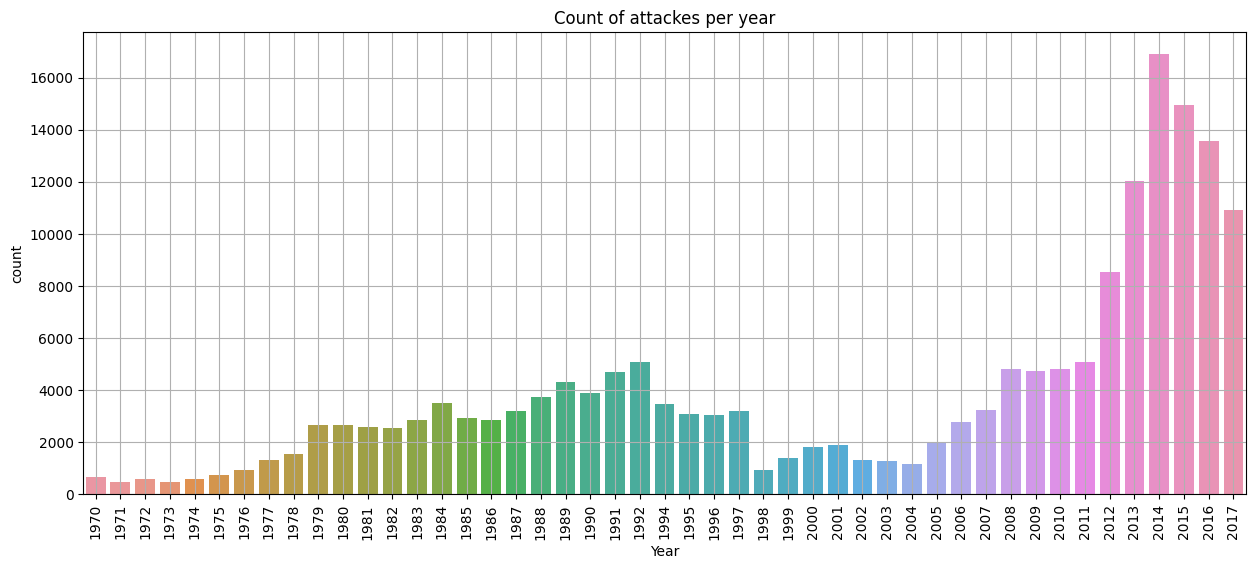

In [34]:
plt.subplots(figsize=(15,6))
sns.countplot(x="Year",data=df)
plt.xticks(rotation=90)
plt.grid()
plt.title("Count of attackes per year")
plt.show

## Kills and wounds per year

In [35]:
grouped=df.groupby("Year")["Number_kills","Number_wound"].sum().reset_index()
grouped

<ipython-input-35-9ea396f1efef>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped=df.groupby("Year")["Number_kills","Number_wound"].sum().reset_index()


,Year,Number_kills,Number_wound
0,1970,174.0,212.0
1,1971,173.0,82.0
2,1972,566.0,409.0
3,1973,370.0,495.0
4,1974,539.0,865.0
5,1975,617.0,617.0
6,1976,674.0,756.0
7,1977,456.0,518.0
8,1978,1459.0,1600.0
9,1979,2100.0,2506.0


<function matplotlib.pyplot.show(close=None, block=None)>

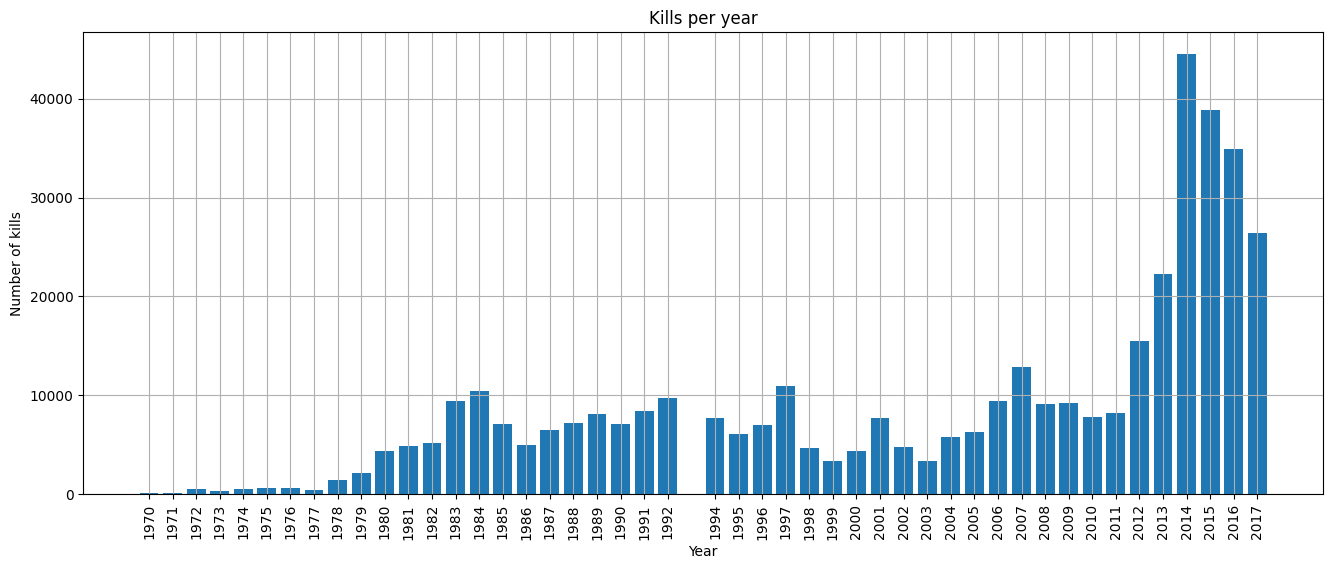

In [36]:
plt.figure(figsize=(16,6))
plt.bar(grouped["Year"],grouped["Number_kills"])
plt.xlabel("Year")
plt.ylabel("Number of kills")
plt.xticks(grouped["Year"],rotation=90)
plt.title("Kills per year")
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

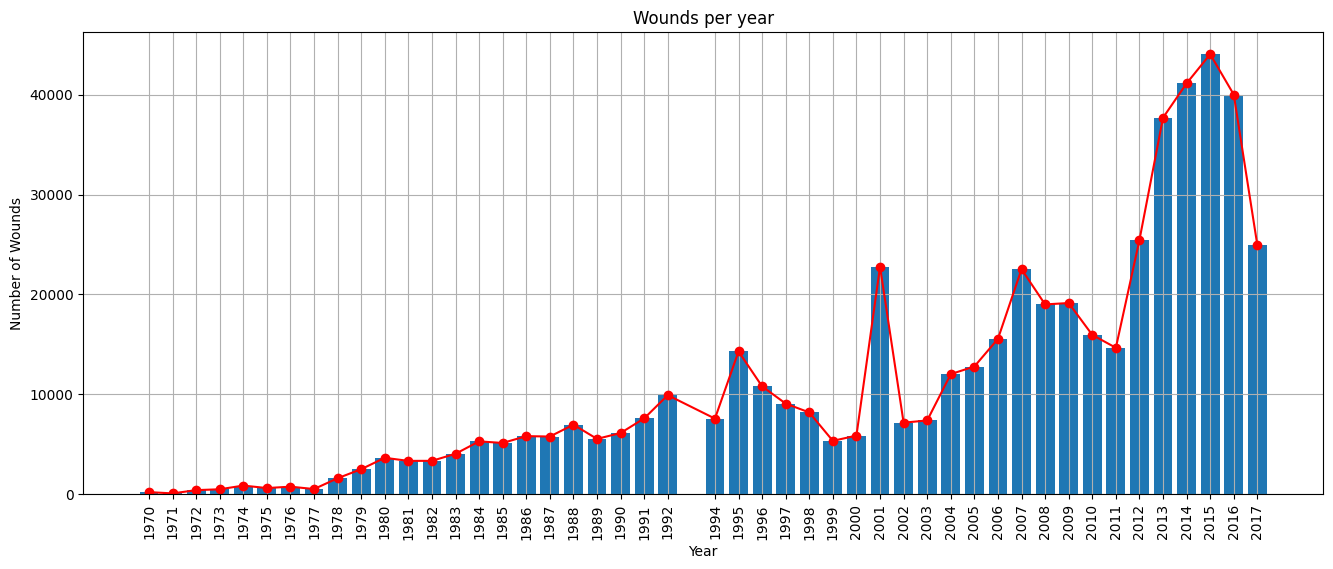

In [37]:
plt.figure(figsize=(16,6))
plt.bar(grouped["Year"],grouped["Number_wound"])
plt.plot(grouped["Year"], grouped["Number_wound"], marker='o', linestyle='-', color='red', label='Trendline')
plt.xlabel("Year")
plt.ylabel("Number of Wounds")
plt.xticks(grouped["Year"],rotation=90)
plt.title("Wounds per year")
plt.grid()
plt.show

## Country wise attacks

In [38]:
df["Country"].value_counts(ascending=False)[:3]

Iraq           24636
Pakistan       14368
Afghanistan    12731
Name: Country, dtype: int64

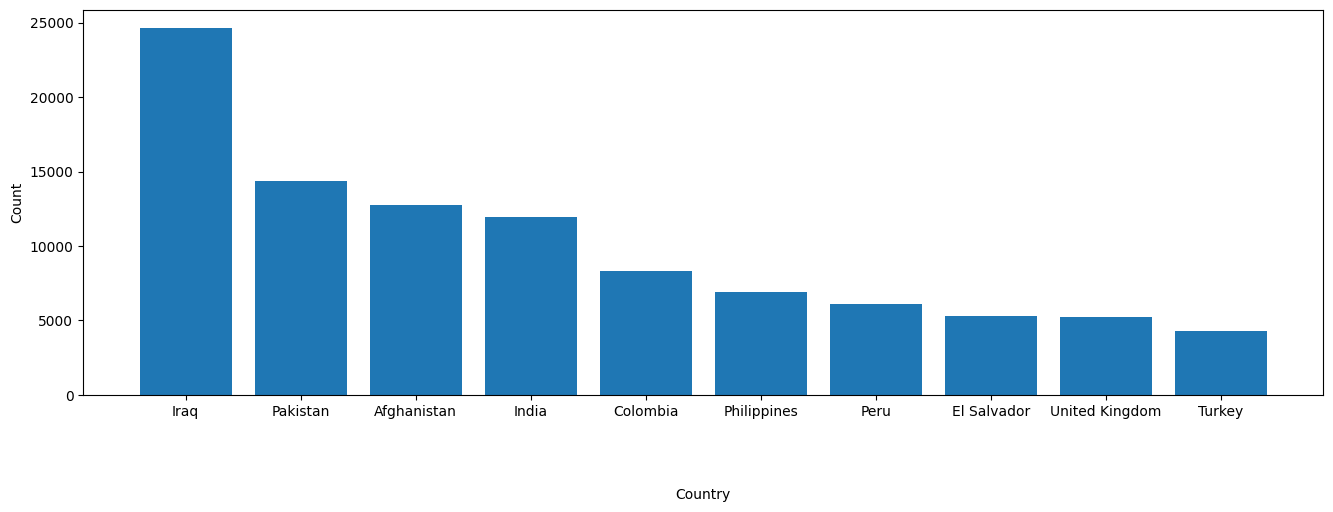

In [39]:
x_lab=df["Country"].value_counts(ascending=False)[:10].index
y_lab=df["Country"].value_counts(ascending=False)[:10].values
plt.figure(figsize=(16,5))
plt.bar(x_lab,y_lab)
plt.xlabel("Country",labelpad=50)
plt.ylabel("Count")
plt.show()

## City wise attacks

In [40]:
df["City"].value_counts(ascending=False)[:4]

Unknown    9775
Baghdad    7589
Karachi    2652
Lima       2359
Name: City, dtype: int64

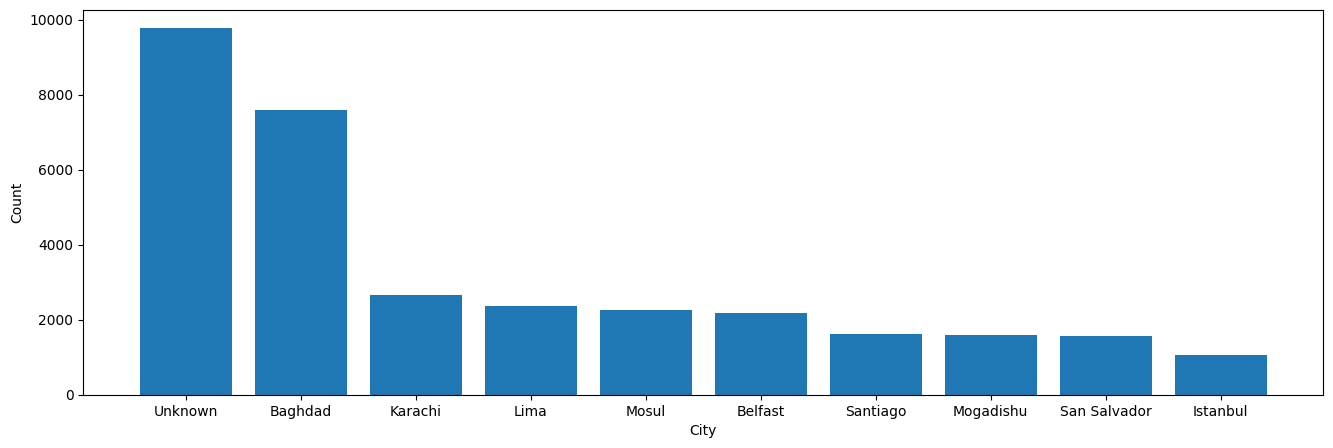

In [41]:
x_lab=df["City"].value_counts(ascending=False)[:10].index
y_lab=df["City"].value_counts(ascending=False)[:10].values
plt.figure(figsize=(16,5))
plt.bar(x_lab,y_lab)
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

## Region wise attacks

In [42]:
df["Region"].value_counts(ascending=False)[:3]

Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Name: Region, dtype: int64

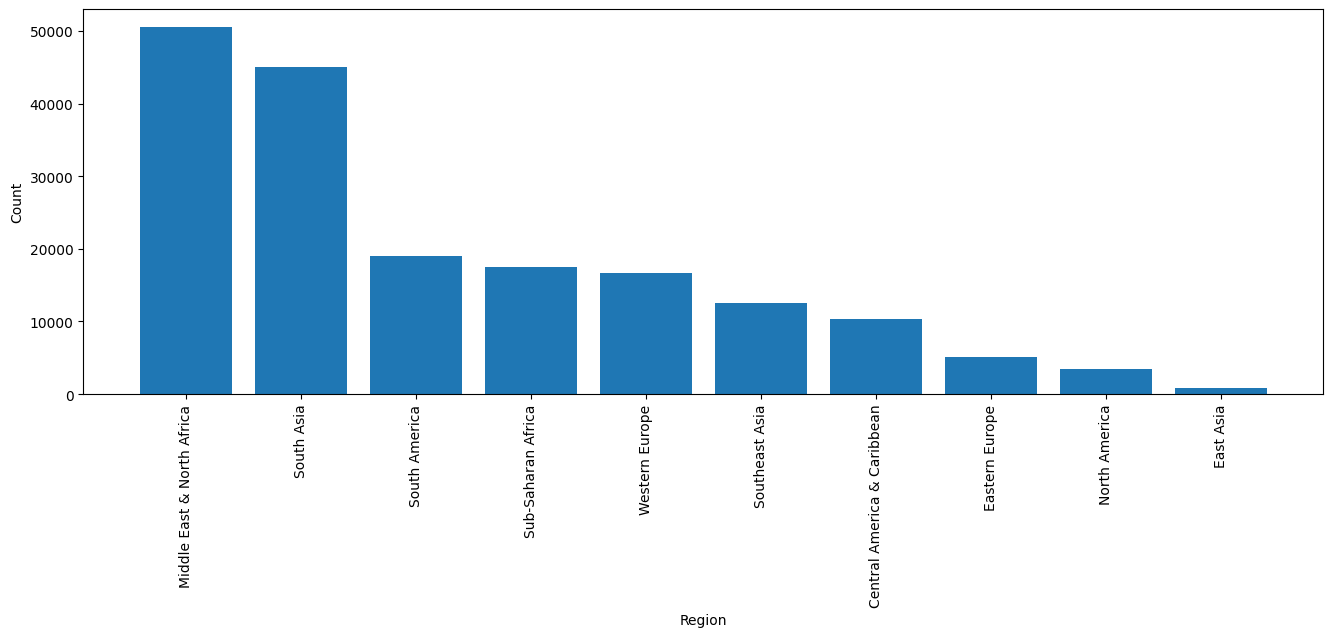

In [43]:
x_lab=df["Region"].value_counts(ascending=False)[:10].index
y_lab=df["Region"].value_counts(ascending=False)[:10].values
plt.figure(figsize=(16,5))
plt.bar(x_lab,y_lab)
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

## Weapon Type


In [44]:
df["Weapon_type"].value_counts(ascending=False)[:3]

Explosives    92426
Firearms      58524
Unknown       15157
Name: Weapon_type, dtype: int64

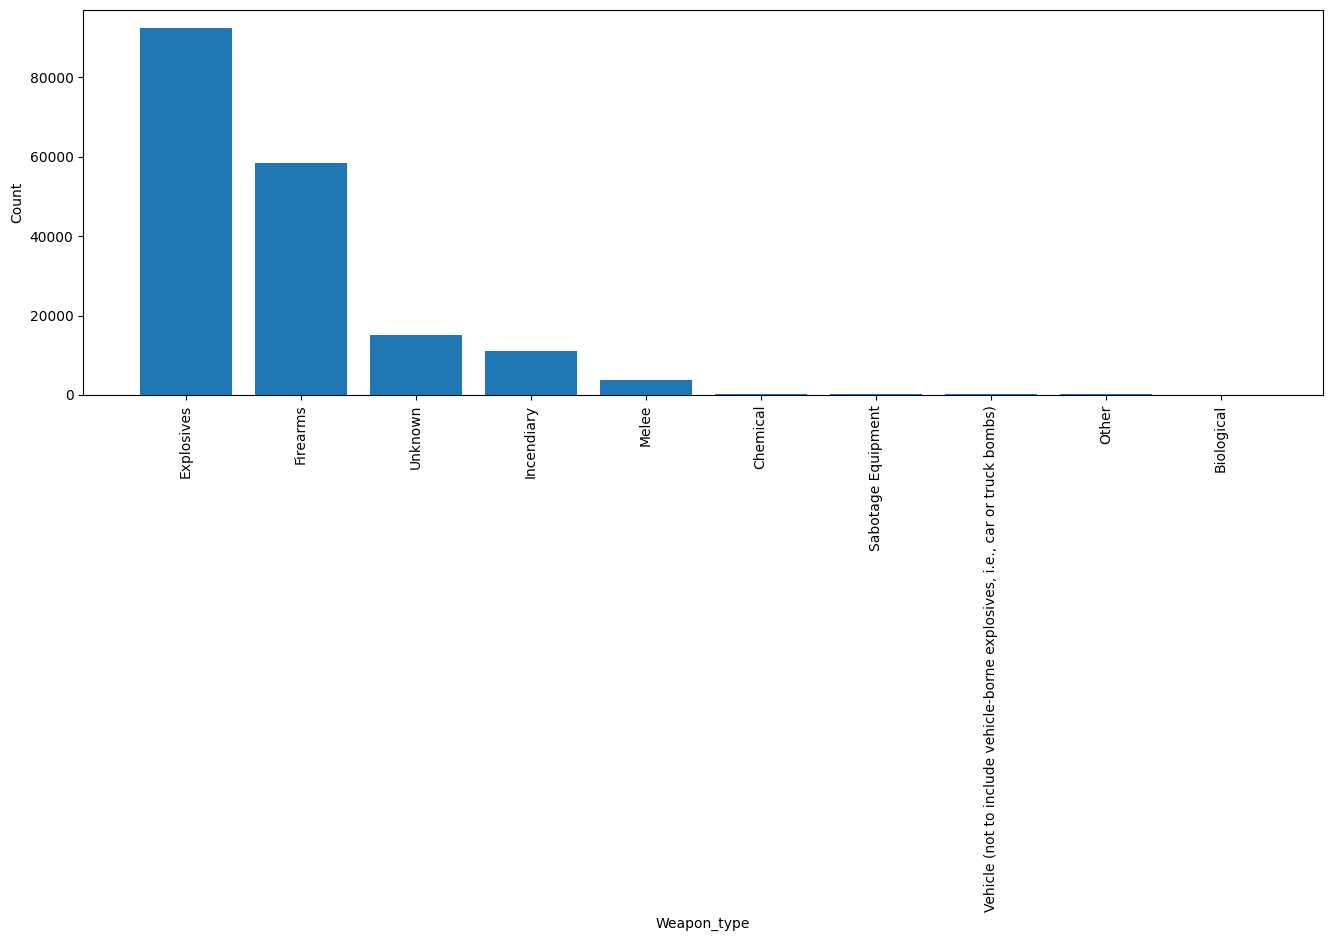

In [45]:
x_lab=df["Weapon_type"].value_counts(ascending=False)[:10].index
y_lab=df["Weapon_type"].value_counts(ascending=False)[:10].values
plt.figure(figsize=(16,5))
plt.bar(x_lab,y_lab)
plt.xlabel("Weapon_type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

## Attacking groups

In [46]:
group=df["Group_name"].value_counts(ascending=False)[:7]
group

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Name: Group_name, dtype: int64

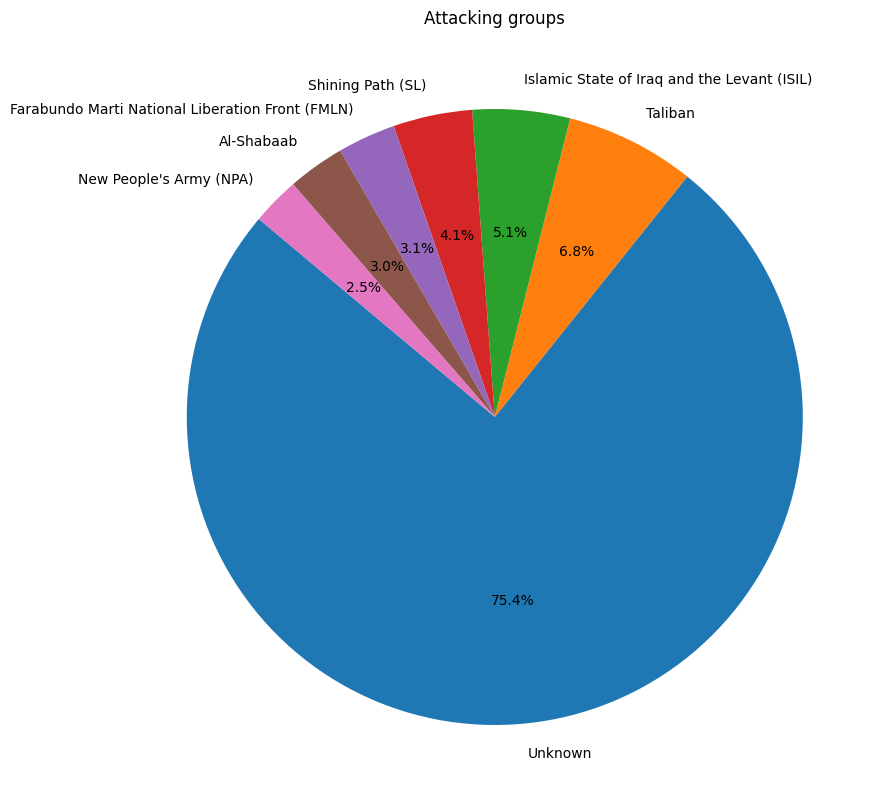

In [47]:
plt.figure(figsize=(10, 10))
plt.pie(group.values, labels=group.index, autopct='%1.1f%%', startangle=140)


plt.title('Attacking groups')
plt.xticks(rotation=90)

plt.show()

## Attacking types

In [48]:
types=df["Attack_type"].value_counts(ascending=False)
types

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64

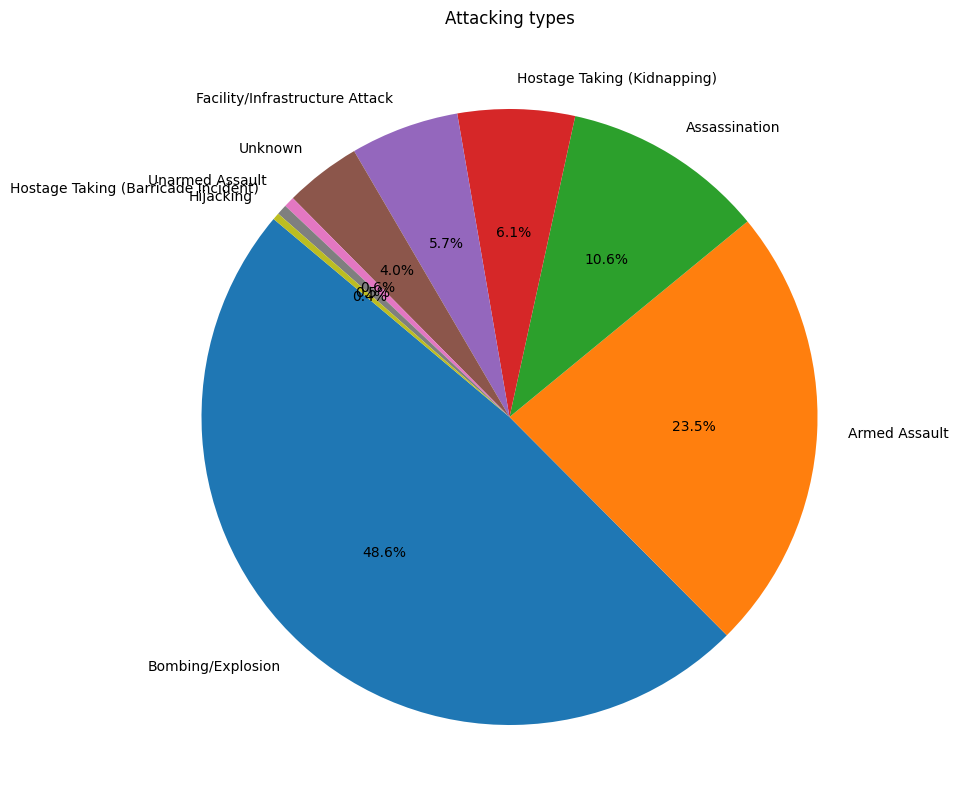

In [49]:
plt.figure(figsize=(10, 10))
plt.pie(types.values, labels=types.index, autopct='%1.1f%%', startangle=140)


plt.title('Attacking types')
plt.xticks(rotation=90)

plt.show()

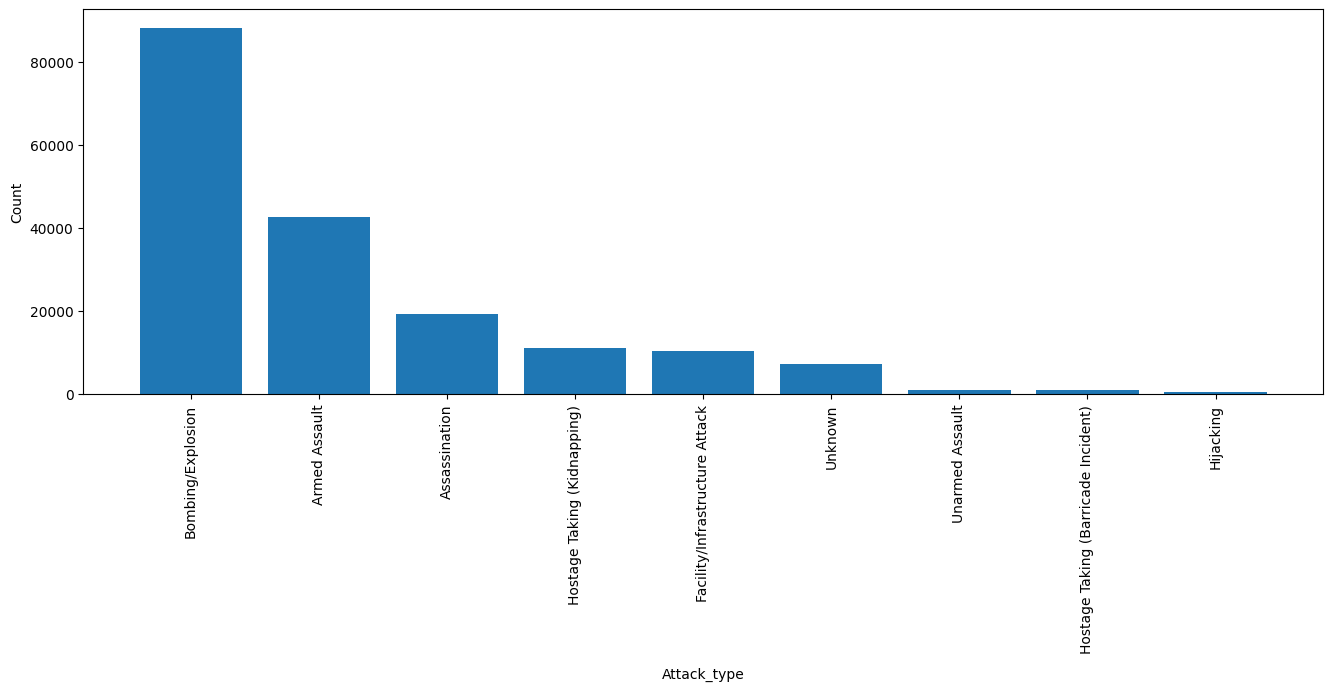

In [50]:
x_lab=df["Attack_type"].value_counts(ascending=False)[:10].index
y_lab=df["Attack_type"].value_counts(ascending=False)[:10].values
plt.figure(figsize=(16,5))
plt.bar(x_lab,y_lab)
plt.xlabel("Attack_type",labelpad=10)
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

## Target type

In [51]:
df["Target_type"].value_counts(ascending=False)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64

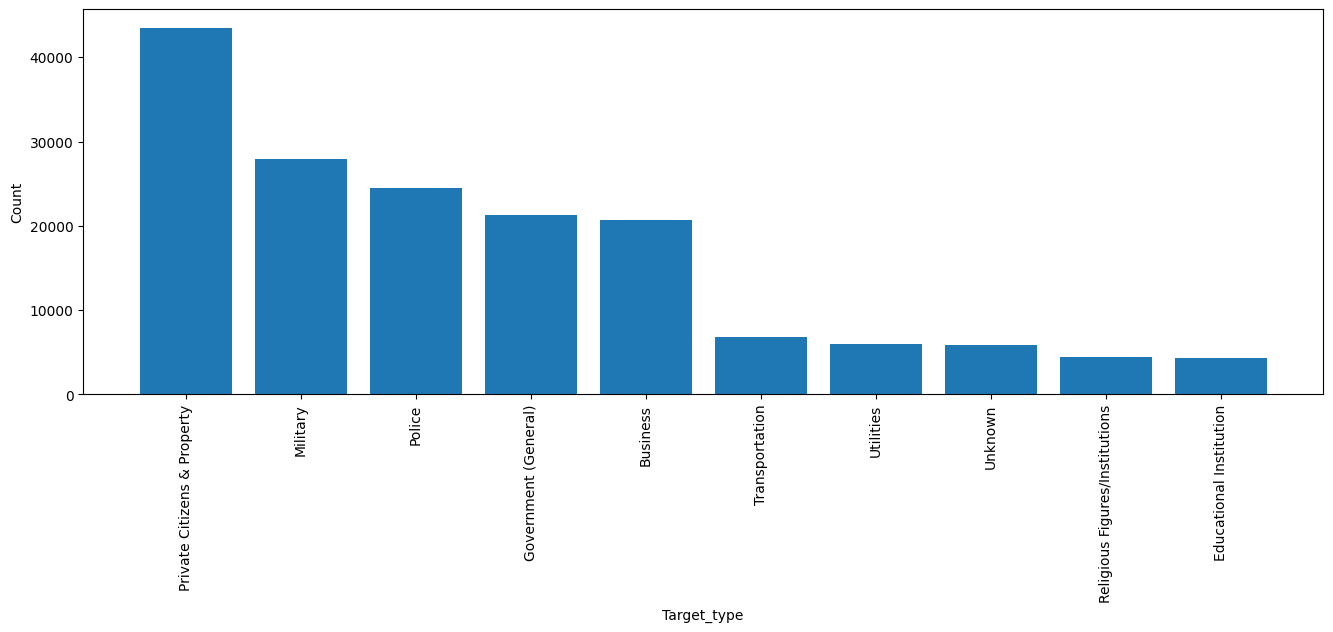

In [52]:
x_lab=df["Target_type"].value_counts(ascending=False)[:10].index
y_lab=df["Target_type"].value_counts(ascending=False)[:10].values
plt.figure(figsize=(16,5))
plt.bar(x_lab,y_lab)
plt.xlabel("Target_type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

## Target type V/S Attacking type

In [53]:
cross_tab = pd.crosstab(df['Target_type'], df['Attack_type'])

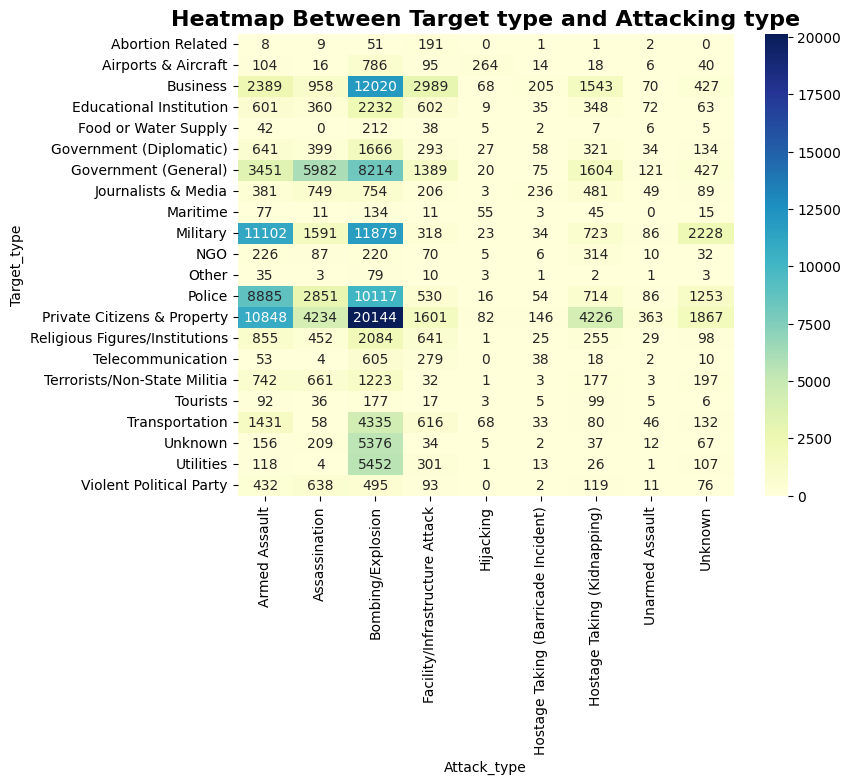

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d', cbar=True)
plt.xlabel('Attack_type')
plt.ylabel('Target_type')
plt.title('Heatmap Between Target type and Attacking type',fontsize=16, fontweight='bold')
plt.show()



## Taliban
**We found that Taliban is most attacking known group. So let's explore the ways of attacks
of Taliban.**

In [55]:
df[df["Group_name"]=="Taliban"]["Attack_type"].value_counts(ascending=False)[:3]


Bombing/Explosion    2866
Armed Assault        2125
Unknown               966
Name: Attack_type, dtype: int64

In [56]:
taliban_target=df[df["Group_name"]=="Taliban"]["Target_type"].value_counts(ascending=False)[:3]
taliban_target

Police                         2535
Military                       1455
Private Citizens & Property    1407
Name: Target_type, dtype: int64

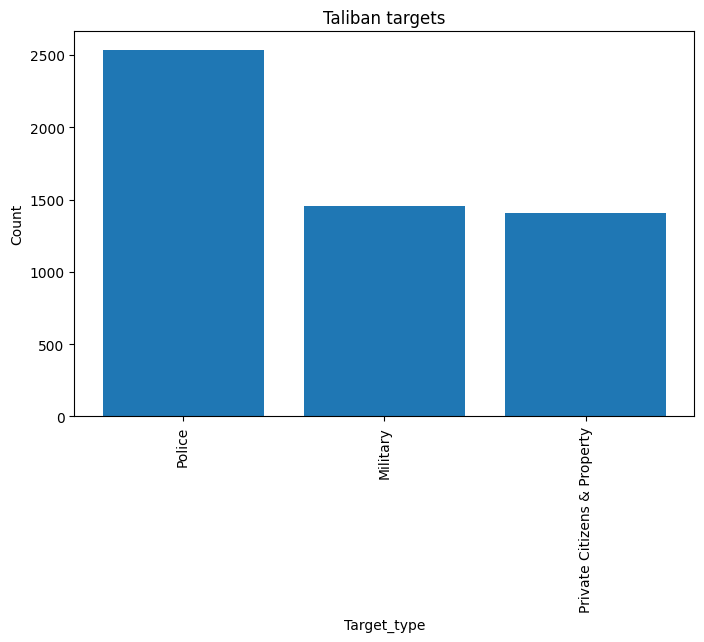

In [57]:
x_lab=taliban_target.index
y_lab=taliban_target.values
plt.figure(figsize=(8,5))
plt.bar(x_lab,y_lab)
plt.xlabel("Target_type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Taliban targets")
plt.show()

In [58]:
tal=df[df["Group_name"]=="Taliban"].groupby("Year")["Number_kills","Number_wound"].sum().reset_index()
tal

<ipython-input-58-c2da3cc50020>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tal=df[df["Group_name"]=="Taliban"].groupby("Year")["Number_kills","Number_wound"].sum().reset_index()


,Year,Number_kills,Number_wound
0,1995,0.0,0.0
1,2001,153.0,1.0
2,2002,5.0,4.0
3,2003,86.0,131.0
4,2004,192.0,129.0
5,2005,293.0,200.0
6,2006,477.0,485.0
7,2007,747.0,512.0
8,2008,753.0,612.0
9,2009,683.0,942.0


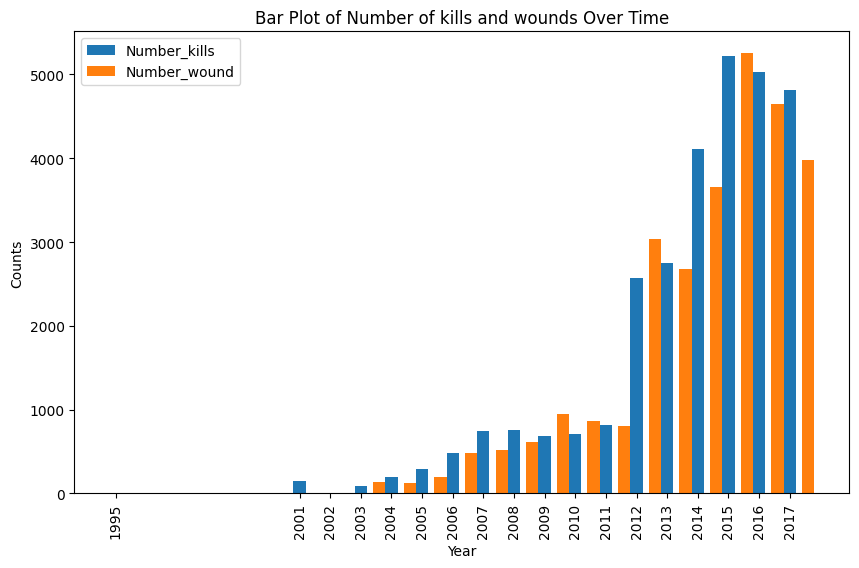

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(tal['Year'], tal['Number_kills'], width=0.4, label='Number_kills', align='center')
plt.bar(tal['Year'] + 0.4, tal['Number_wound'], width=0.4, label='Number_wound', align='edge')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Bar Plot of Number of kills and wounds Over Time')


plt.xticks(tal['Year'],rotation=90)
plt.legend()

# Show the plot
plt.show()

In [60]:
df[df["Group_name"]=="Taliban"].groupby("Country")["Number_kills","Number_wound"].sum()

<ipython-input-60-cc4926ec2032>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[df["Group_name"]=="Taliban"].groupby("Country")["Number_kills","Number_wound"].sum()


,Number_kills,Number_wound
Country,,
Afghanistan,29269.0,27871.0
Pakistan,138.0,59.0
Turkmenistan,3.0,2.0


## Terrorism on World Map
**Let's show the map of the world to understand the intensity of terrorism in each country**


In [61]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-61-fb56bf95bef3>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [62]:
country=df["Country"].value_counts(ascending=False).reset_index()
country

,index,Country
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
...,...,...
200,International,1
201,Wallis and Futuna,1
202,South Vietnam,1
203,Andorra,1


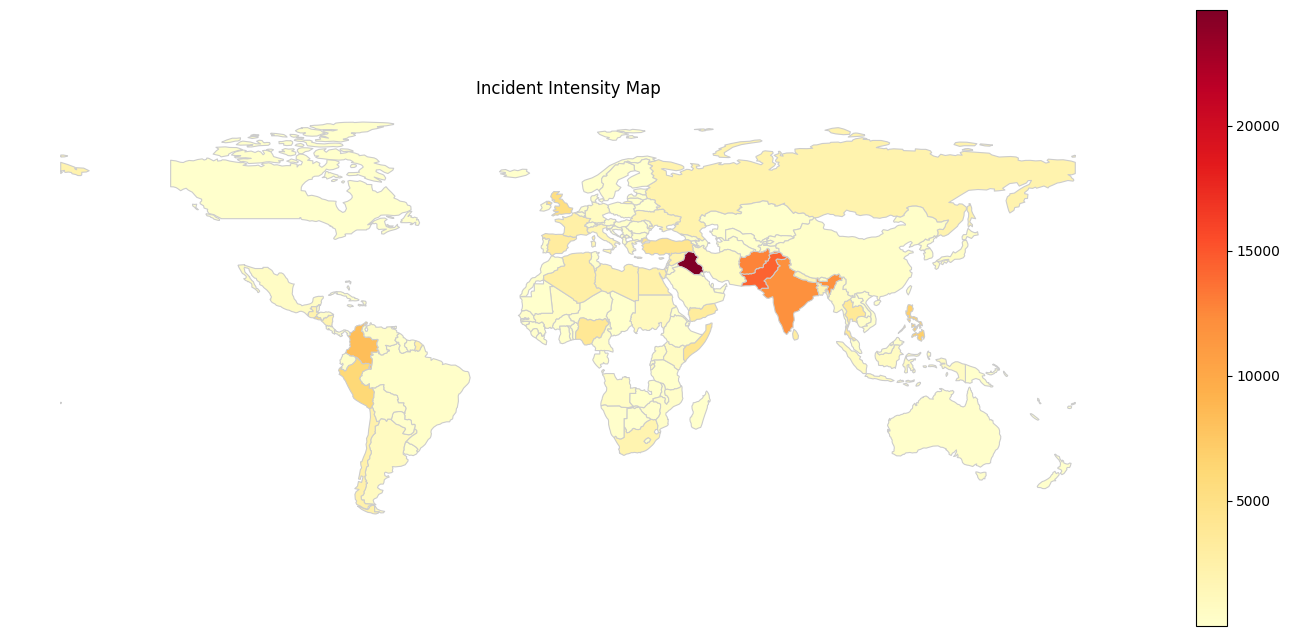

In [63]:
# Merge the world map with the data
world = world.merge(country, left_on="name", right_on="index",how="left")

# Plot the world map with colors indicating variable intensity
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
world.plot(column="Country", cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title and customize the legend
ax.set_title('Incident Intensity Map')
ax.set_axis_off()  # Turn off the axis


# Show the map
plt.show()




## Key Findings

1. Years 2014,2015 and 2016 witnessed a rush of terroris attacks. 2014 is the most attacks occured year.<br><br>
2. Around 45000 peole were killed and 41000 people were wounded in the year 2014 around the world.<br><br>
3. Countries called Iraq, Pakistan and Afganistan witnessed the most of terrorist attacks respectively.Iraq faced around 24600 attacks in total.<br><br>
4. Cities called Baghdad, Karachi and Lima witnessed the most of terrorist attacks respectively.<br><br>
5. Regions Middle east & North Africa, South Asia and South America witnessed the most of terrorist attacks respectively.<br><br>
6. Mostly used weapon types are explosives and fire arms.<br><br>
7. Taliban and Islamic State of Iraq and the Levant (ISIL) are the most attacking known groups respectively.<br><br>
8. Main targets of these groups are Private Citizens & Property , Military and Police respectively.<br><br>
9. Heatmap Between Target type and Attacking type clearly help us to understand the relation between the respective variables. Private Citizens & Property faced 20114 Bombing or explosions.<br><br>
10. Found that Taliban is most attacking known group. Their main targets were Police and military. Commonly they have used bombing or explosive methods for attacks. Around 30000 peoaple were killed in Afganistan by Taliban attacks.



## Conclusion
In conclusion,  Exploratory data analysis of terrorism data plays a crucial role in understanding and addressing the global terrorism threat. It assists in identifying trends, assessing risk regions, and gaining insights into the nature of attacks.Utilizing various visualization methods, such as bar charts, heatmaps, and pie plots, has proven effective in simplifying complex datasets. These visualizations provide a clear and concise way to comprehend the intricate nature of terrorist incidents.The years 2014, 2015, and 2016 experienced a significant surge in terrorist attacks, with 2014 being the year with the highest number of recorded attacks.Iraq, Pakistan, and Afghanistan were the countries most heavily affected by terrorist attacks, with Iraq enduring the highest number of attacks, totaling around 24,600.The primary targets of these groups varied, with Private Citizens & Property, Military, and Police being the primary targets, respectively.The Taliban emerged as the most active known terrorist group, with a focus on targeting police and military personnel. Their preferred method of attack was bombings or explosives.